# Домашняя работа 2. Линейная регрессия. Работа с датасетом Card Moldova

Импортируем библиотеки

In [ ]:
import pandas as pd
from google.colab import files 

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Класс линейной регрессии без регуляризации

In [ ]:
class LinearRegression():
    def __init__(self, 
                 learning_rate = 0.5, 
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)
        
        # если веса и смещения заданы
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
                self.weights = np.append(self.bias,self.weights)
    
    #метод для прямого распространения
    def forward(self, X):
        return self.weights.dot(X.T)
    
    #метод для рассчета функции потерь
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size
    
    #метод для рассчета градиента
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size
    
    #метод для обновления весов
    def update(self):    
        return self.weights - self.lr*self.grad
    
    #метод для инициализации весов
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)
    
    #метод для добавления колонки смещения
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    #метод для предсказания значений целевой переменной с текущими весами 
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat
    
    #метод для оценки работы модели
    def score(self, X, y):        
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))

     #метод для формирования и загрузки бэтча
    def load_batch(self,X,y):
        idx_batch = np.random.randint(0,X.shape[0],self.batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        x_batch   = self.add_bias(x_batch)
        y_batch   = np.take(y, idx_batch)
        return  x_batch, y_batch

    #метод обучения модели
    def fit(self, X, y):

        np.random.seed(self.seed)
        
        # в начале инициализируются веса и смещение и совмещаются в один массив
        if self.weights is None:
            self.weights = self.init(X.shape[1])
        
        if self.bias is None: 
            self.bias    = self.init(1)
        
        if self.weights.size == X.shape[1]:
            self.weights = np.append(self.bias,self.weights)
        
        # инициализация градиента, потерь и загрузка батча
        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:            
            x_batch   = self.add_bias(X)
            y_batch   = y
        
        for i in range(self.epochs): 

            if self.batch_size: 
                x_batch, y_batch = self.load_batch(X,y)

            yhat         = self.forward(x_batch)
            self.grad    = self.grad_step(yhat,  y_batch, x_batch) 
            self.weights = self.update()  
            self.cost[i] = self.loss(yhat,  y_batch)

        self.bias = self.weights[0]
     
    #функция построения графика потерь для проверки работы алгоритма
    def plot_cost(self, figsize = (8,4), title = ''):
        plt.figure(figsize = figsize)
        plt.plot(self.cost)
        plt.grid()
        plt.xlabel('Эпоха', fontsize = 18)
        plt.ylabel('Функция Потерь', fontsize = 18)
        plt.title(title, fontsize = 24)
        plt.show()
    
    #функция, возвращающая текущие значения весов и смещения
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

Класс линейной регрессии с эластичной регуляризацией (L1 и L2)

In [ ]:
class ElasticRegression(LinearRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l1_penalty = 0.001,
                 l2_penalty = 0.001,
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 random_state = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         random_state = random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty
    #рассчет потерь с учетом "штрафа" за размер весов
    def loss(self,yhat, y):   
        l1_term = self.l1_penalty*np.sum(self.weights[1:])
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))
        return np.square(yhat - y).mean() + l1_term + l2_term
                  
    
    #прямое распространение
    def update(self):    
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad +  np.sign(self.weights)*self.l1_penalty + l2_term)

Функция предсказания целевой переменной с текущей моделью

In [1]:
def predict(weights, inputs):
    yhat = np.zeros(inputs.shape[0])
    
    for m in range(inputs.shape[0]):
        yhat[m] = inputs[m,:].dot(weights.T)
    
    return yhat

## Формирование тестовой и тренировочной выборок

Загрузка датасета

In [ ]:
uploaded = files.upload()

Saving cars_moldova_processed.csv to cars_moldova_processed.csv


In [ ]:
df = pd.read_csv('/content/cars_moldova_processed.csv')

Списки столбцов с числовыми и категориальными данными

In [ ]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission', 'km_category', 'engine_category']
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'Age', 'km_year', 'Engine_capacity(litre)']

In [ ]:
df.head(7)

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,km_category,Engine_capacity(litre),engine_category
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727,Middle,1.80,Small
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000,Middle,1.50,Small
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000,Middle,1.50,Small
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000,Middle,1.60,Small
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636,Middle,2.20,Medium
5,Volkswagen,Passat,2010,Universal,290000.0,1390.0,Petrol,Manual,5600.0,12,24166.666667,Big,1.39,Small
6,Volkswagen,Touareg,2010,SUV,220000.0,2400.0,Diesel,Automatic,17000.0,12,18333.333333,Middle,2.40,Medium


Разбиваем на тренировочную и тестовые выборки

In [ ]:
df_numerical = df[num_columns].copy()

X = df_numerical.drop(columns = 'Price(euro)').values
features_names = df_numerical.drop(columns = 'Price(euro)').columns

y = df_numerical['Price(euro)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train) 
X_test  = scaler.transform(X_test) 

## Реализация линейной регрессии

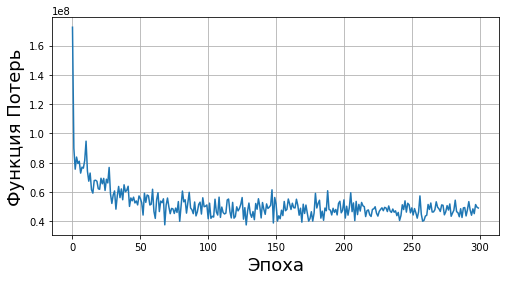

0.4750585822696395 0.48602437018672906
train R2: 0.4860; test R2: 0.4751


In [ ]:
regr = ElasticRegression(learning_rate=0.3, epochs=300, batch_size=3000, l1_penalty = 0.1, l2_penalty = 0.001 )
regr.fit(X_train, y_train)

regr.plot_cost()

print(regr.score(X_test, y_test), regr.score(X_train, y_train))
print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

## Оценка весов

In [ ]:
def vis_weigths(weights, names):
    numbers = np.arange(0,len(weights))
    tick_labels = names
    cc=['']*len(numbers)
    for n,val in enumerate(weights):
        if val<0:
            cc[n]='red'
        elif val>=0:
            cc[n]='blue'

    plt.bar(x = numbers, height = weights, color = cc)
    plt.xticks(np.arange(0,len(weights)),tick_labels, rotation = 45 );

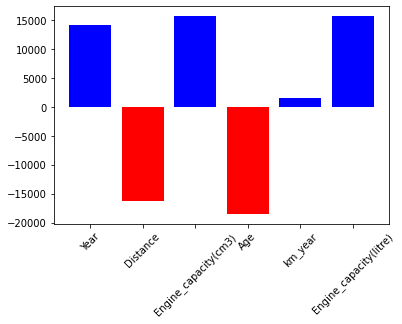

In [ ]:
w, b = regr.get_w_and_b()

vis_weigths(w, features_names)

Как мы видим по полученной гистограмме, наиболее значимым параметром является возраст автомобиля, за которым следует пробег, а самым незначимым - удельный пробег в год. Три других параметра также довольно значимы, но немного уступают пробегу.

## Работа с данными с различными типами предварительной обработки

Для оценки результатов с различными типами предварительной обработки загрузим файлы, созданные в домашней работе 1

### cars_power - степенное преобразование.

In [ ]:
up_power = files.upload()

Saving cars_power.csv to cars_power.csv


In [ ]:
cars_power = pd.read_csv('/content/cars_power.csv')

In [ ]:
df_num_p = cars_power[num_columns].copy()

X = df_num_p.drop(columns = 'Price(euro)').values
features_names = df_num_p.drop(columns = 'Price(euro)').columns

y = df_num_p['Price(euro)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train) 
X_test  = scaler.transform(X_test) 

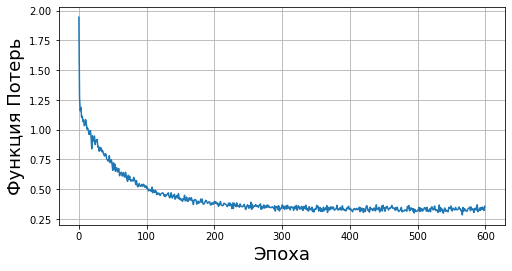

0.6726691149954798 0.6807720372539967
train R2: 0.6808; test R2: 0.6727


In [ ]:
regr = ElasticRegression(learning_rate=0.1, epochs=600, batch_size=3000, l1_penalty = 0.001, l2_penalty = 0.001 )
regr.fit(X_train, y_train)

regr.plot_cost()

print(regr.score(X_test, y_test), regr.score(X_train, y_train))
print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

### cars_norm - normalization

In [ ]:
up_norm = files.upload()

Saving cars_normalization.csv to cars_normalization.csv


In [ ]:
cars_norm = pd.read_csv('/content/cars_normalization.csv')

In [ ]:
df_num_p = cars_norm[num_columns].copy()

X = df_num_p.drop(columns = 'Price(euro)').values
features_names = df_num_p.drop(columns = 'Price(euro)').columns

y = df_num_p['Price(euro)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train) 
X_test  = scaler.transform(X_test) 

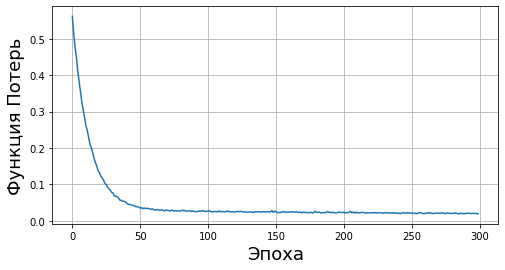

-1.267436786862382 -1.1930639184874194
train R2: -1.1931; test R2: -1.2674


In [ ]:
regr = ElasticRegression(learning_rate=0.01, epochs=300, batch_size=3000, l1_penalty = 0.0001, l2_penalty = 0.0001 )
regr.fit(X_train, y_train)

regr.plot_cost()

print(regr.score(X_test, y_test), regr.score(X_train, y_train))
print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

### cars_standard - standartization

In [ ]:
up_st = files.upload()

Saving cars_standartization.csv to cars_standartization.csv


In [ ]:
cars_standard = pd.read_csv('/content/cars_standartization.csv')

In [ ]:
df_num_p = cars_standard[num_columns].copy()

X = df_num_p.drop(columns = 'Price(euro)').values
features_names = df_num_p.drop(columns = 'Price(euro)').columns

y = df_num_p['Price(euro)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train) 
X_test  = scaler.transform(X_test) 

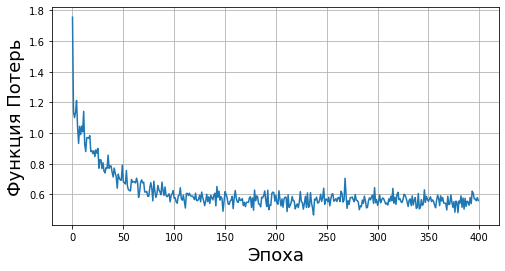

0.47552947687589053 0.48401010975558945
train R2: 0.4840; test R2: 0.4755


In [ ]:
regr = ElasticRegression(learning_rate=0.2, epochs=400, batch_size=7000, l1_penalty = 0.005, l2_penalty = 0.005 )
regr.fit(X_train, y_train)

regr.plot_cost()

print(regr.score(X_test, y_test), regr.score(X_train, y_train))
print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

В зависимости от метода предварительной обработки изменяется необходимая величина шага. В среднем, все методы предварительной обработки улучшили результат модели, но самые высокие показатели у нормализации и степенного преобразования.

### cars_ohe - one hot encoding

Создадим копию датафрейма и заменим все категориальные признаки на числовые с помощью OHE

In [ ]:
cars_ohe = df.copy()
cars_ohe = pd.get_dummies(cars_ohe)

In [ ]:
df_num_p = cars_ohe.copy()

X = df_num_p.drop(columns = 'Price(euro)').values
features_names = df_num_p.drop(columns = 'Price(euro)').columns

y = df_num_p['Price(euro)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler  = MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train) 
X_test  = scaler.transform(X_test) 

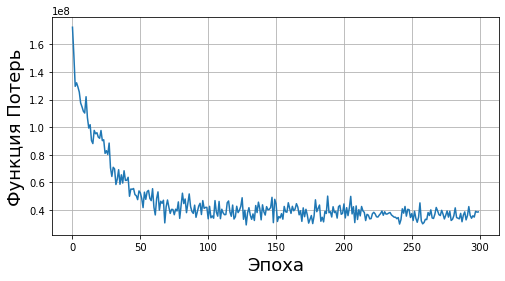

0.6058042820302618 0.613427817923522
train R2: 0.6134; test R2: 0.6058


In [ ]:
regr = ElasticRegression(learning_rate=0.25, epochs=300, batch_size=3000, l1_penalty = 0.001, l2_penalty = 0.001 )
regr.fit(X_train, y_train)

regr.plot_cost()

print(regr.score(X_test, y_test), regr.score(X_train, y_train))
print( 'train R2: %.4f; test R2: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

Используя данные с предварительным one hot encoding удалось добиться более высоких результатов